In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- If youve already done this for Ne, you dont need to do here too

In [ ]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [ ]:
import DiadFit as pf
pf.__version__

In [ ]:
DayFolder=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Diad_Fitting_Nov22nd2022'
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

In [ ]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False

## Now load the files of interest

In [ ]:
Diad_Files_Weak = joblib.load('Diad_Files_Grp2.sav')

In [ ]:
Diad_Files_Weak

In [ ]:
# Select one file to tweak fit on
filename_Weak='POC25.txt' #Diad_Files_Weak[1]
filename_Weak

In [ ]:
plot1=pf.plot_diad(path=spectra_path, filename=filename_Weak, filetype=filetype)

## Decide if you want a secondary peak
- If you dont have the peak, it is only a little slower, but it works if it only appears in a small number of spectra still

In [ ]:
# Decide if you want to fit a carbonate peak or not here. 
fit_sec_peak=False

if fit_sec_peak is True:

    # Tweak options here, can exclude a range for example using exclude_range=Tuple[float, float]
    generic_Config=pf.generic_peak_config(lower_bck=(1110, 1130), 
    upper_bck=(1160, 1180), cent_generic=1150, name='SO2')

    generic_fit=pf.fit_generic_peak(config=generic_Config, path=spectra_path, 
    filename=filename_Weak, filetype=filetype)
    generic_fit

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

In [ ]:
diad_id_config=pf.diad_id_config(height=50)
diad_id_config

In [ ]:
# Specify the number of peaks, 1 = just peak, 2 = Peak+hot bands
n_peaks_diad1=2
n_peaks_diad2=2
    
diad1_peaks, diad2_peaks=pf.identify_diad_peaks(
    config=diad_id_config, path=spectra_path, filename=filename_Weak,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, n_peaks_diad2=n_peaks_diad2)

In [ ]:
Diad_df=pf.get_data(path=spectra_path, filename=filename_Weak, filetype='headless_txt')

In [ ]:
Diad_df

In [ ]:
run_mean=np.empty(len(Diad_df), float)
run_std=np.empty(len(Diad_df), float)
mov_av=2
for i in range(0, len(Diad_df)):
    if i<=mov_av:
        run_mean[i]=np.nan
        run_std[i]=np.nan
    elif i>len(Diad_df)-mov_av:
        run_mean[i]=np.nan
        run_std[i]=np.nan
    else:
        
        y=Diad_df[:, 1]
        x=np.linspace(0, len(Diad_df)-1, len(Diad_df))
        run_mean[i]=np.nanmean(y[(x>i-mov_av)&(x<i+mov_av)& (x!=i)])
        run_std[i]=np.nanstd(y[(x>i-mov_av)&(x<i+mov_av)& (x!=i)])

In [ ]:
run_mean[5:20]

In [ ]:
y=Diad_df[:, 1]
x=Diad_df[:, 0]

In [ ]:
y[(x>i-mov_av)& (x>i+mov_av)]

In [ ]:
plt.plot(Diad_df[:, 0], Diad_df[:, 1], 'ok')
plt.plot(Diad_df[:, 0], run_mean, '-r')
plt.plot(Diad_df[:, 0], run_std, '-g')

In [ ]:
wavelength=Diad_df[:, 0]
intensity=Diad_df[:, 1]

(1260.0, 1400.0)

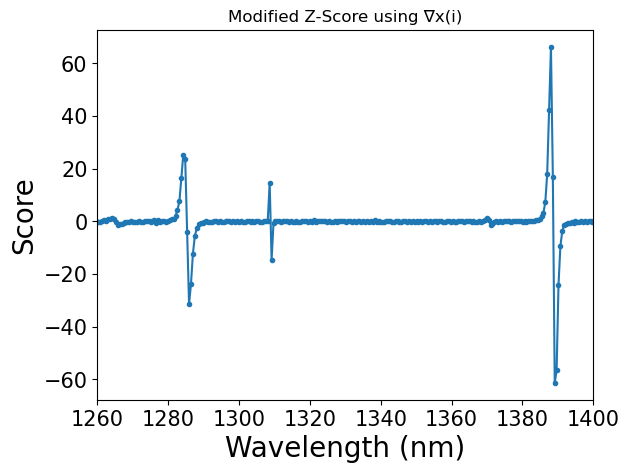

In [95]:
factor=0.1 #6745
def modified_z_score(intensity):
    median_int = np.median(intensity)
    mad_int = np.median([np.abs(intensity - median_int)])
    modified_z_scores = factor * (intensity - median_int) / mad_int
    return modified_z_scores
# First we calculated ∇x(i):
dist = 0
delta_intensity = [] 
for i in np.arange(len(intensity)-1):
 dist = intensity[i+1] -intensity[i]
 delta_intensity.append(dist)
delta_int = np.array(delta_intensity)
# Alternatively to the for loop one can use: 
# delta_int = np.diff(intensity)

intensity_modified_z_score = np.array(modified_z_score(delta_int))
plt.plot(wavelength[1:], intensity_modified_z_score, '.-')
plt.title('Modified Z-Score using ∇x(i)')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Wavelength (nm)', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
plt.xlim([1260, 1400])

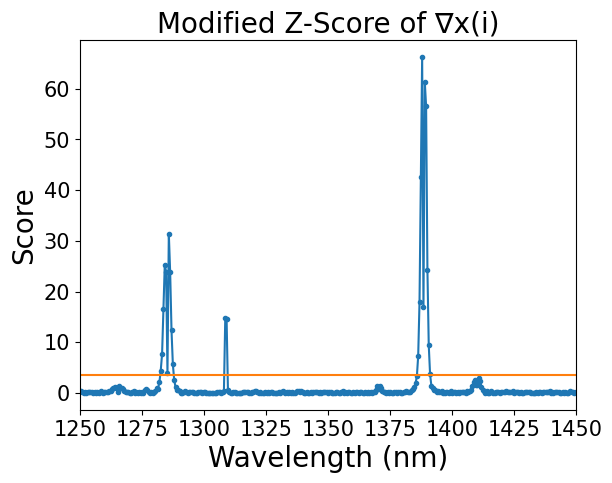

In [106]:
threshold = 3.5
intensity_modified_z_score = np.array(np.abs(modified_z_score(delta_int)))
plt.plot(wavelength[1:], intensity_modified_z_score, 
        '.-')
plt.plot(wavelength[1:], threshold*np.ones(len(wavelength[1:])), label = 'threshold')
plt.title('Modified Z-Score of ∇x(i)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Wavelength (nm)', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
plt.xlim([1250, 1450])
plt.show()

FloatingPointError: invalid value encountered in double_scalars

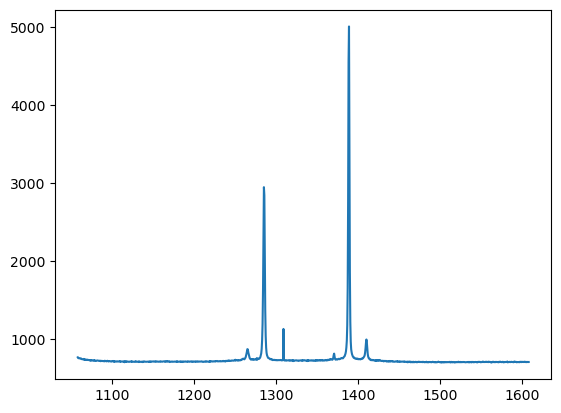

In [102]:
def fixer(y,m):
    threshold = 10 # binarization threshold. 
    spikes = abs(np.array(modified_z_score(np.diff(y)))) > threshold
    y_out = y.copy() # So we don’t overwrite y
    for i in np.arange(len(spikes)):
        if spikes[i] != 0: # If we have an spike in position i
            w = np.arange(i-m,i+1+m) # we select 2 m + 1 points around our spike
            w2 = w[spikes[w] == 0] # From such interval, we choose the ones which are not spikes
            y_out[i] = np.mean(y[w2]) # and we average their values
    return y_out
# Does it work?
plt.plot(wavelength, intensity, label = 'original data')
plt.plot(wavelength, fixer(intensity,m=3), label = 'fixed spectrum')
plt.title('Despiked spectrum',fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Wavelength (nm)' ,fontsize = 20)
plt.ylabel('Intensity (a.u.)' ,fontsize = 20)
plt.legend()
plt.show()

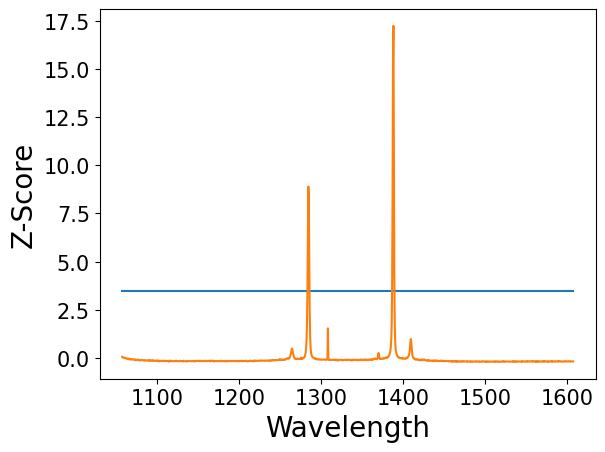

In [81]:
def z_score(intensity):
    mean_int = np.mean(intensity)
    std_int = np.std(intensity)
    z_scores = (intensity - mean_int) / std_int
    return z_scores

threshold = 3.5
plt.plot(wavelength, threshold*np.ones(len(wavelength)), label = 'threshold')
intensity_z_score = np.array(z_score(intensity))
plt.plot(wavelength, intensity_z_score)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Wavelength' ,fontsize = 20)
plt.ylabel('Z-Score' ,fontsize = 20)
plt.show()

In [ ]:
def spot_cosmic_rays(

In [ ]:
## Choose a model - option, pseudovoigt or voigt
model_name='PseudoVoigtModel'

## Fit Diad 1
- You can tweak the parameters in diad1_fit_config

In [ ]:
diad1_fit_config_init=pf.diad1_fit_config(model_name=model_name,
N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1220),
diad_sigma=0.6, sigma_allowance=2,
y_range_baseline=200,
x_range_residual=10, x_range_baseline=30, HB_amplitude=5, diad_amplitude=1000)
diad1_fit_config_init

In [ ]:
# ## How are we constraining hot bands
# - If no gaussian - as HB Amplitude, then peakpArea/100, Peakp_Area/5
# - fwhm = 

# Peakp_sigma/10 and Peakp_sigma*10

In [ ]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename_Weak, filetype=filetype, close_figure=False)
Diad1_fit

In [ ]:
### Now lets update the tweakable parameters with the sigma values
diad1_fit_config=diad1_fit_config_init
diad1_fit_config.diad_sigma=Diad1_fit['Diad1_Voigt_Sigma'][0]
diad1_fit_config.diad_amplitude=Diad1_fit['Diad1_Voigt_Area'][0]
diad1_fit_config.HB_amplitude=Diad1_fit['HB1_Area'][0]
diad1_fit_config.sigma_allowance=2
diad1_fit_config

## Fit diad 2

In [ ]:
diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
diad_sigma=0.5,  N_poly_bck_diad2=2,
HB_amplitude=100,                                          
x_range_residual=10, 
diad_amplitude=6000, 
x_range_baseline=30)
diad2_fit_config_init

In [ ]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config, peak_pos_voigt=diad2_peaks,
path=spectra_path, filename=filename_Weak, filetype=filetype, close_figure=False)
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

In [ ]:
# Update param with new sigma
diad2_fit_config=diad2_fit_config_init
diad2_fit_config.diad_sigma=Diad2_fit['Diad2_Voigt_Sigma'][0]
diad2_fit_config.sigma_allowance=2
diad2_fit_config.diad_amplitude=Diad2_fit['Diad2_Voigt_Area'][0]
diad2_fit_config.HB_amplitude=Diad2_fit['HB2_Area'][0]
diad2_fit_config

## You can also try looping if all your spectra are pretty similar

In [ ]:
from tqdm import tqdm
plot_figure=False # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself
to_clipboard=False # Copies to clipboard
Diad_Files_Weak_i=Diad_Files_Weak
df_Weak = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files_Weak))): #
    
    filename=Diad_Files_Weak[i]

    if fit_sec_peak is True:
    
        generic_fit=pf.fit_generic_peak(config=generic_Config, path=spectra_path, 
filename=filename, filetype=filetype)


    diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config,
            path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, 
    n_peaks_diad2=n_peaks_diad2, plot_figure=False)

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=close_figure)

    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
        config2=diad_id_config, peak_pos_voigt=diad2_peaks,
    path=spectra_path, filename=filename, filetype=filetype, close_figure=close_figure)
    
    if fit_sec_peak is True:
        data=pf.combine_diad_outputs(filename=filename, prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,
     to_clipboard=to_clipboard,                    
    Diad2_fit=Diad2_fit, Carb_fit=generic_fit)
        
    
    else:
        data=pf.combine_diad_outputs(filename=filename, prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,
     to_clipboard=to_clipboard,                    
    Diad2_fit=Diad2_fit)        
    

    df_Weak = pd.concat([df_Weak, data], axis=0)


## Here are some figures to inspect the relationship between residuals and areas etc. 

In [ ]:
df_Weak['Diad1_refit']

In [ ]:
# These ones triggered at least one warning, so need to be refit
refit_d1=(df_Weak['Diad1_refit']==True)
refit_d2=(df_Weak['Diad2_refit']==True)
refit=refit_d1|refit_d2

In [ ]:
sum(refit)

In [ ]:
df_Weak.columns

In [ ]:

x1='Diad1_Voigt_Cent'
x2='Diad2_Voigt_Cent'
y1='Diad1_fwhm'
y2='Diad2_fwhm'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Weak[x1], df_Weak[y1], 'or')
ax2.plot(df_Weak[x2], df_Weak[y2], 'ob')
ax1.plot(df_Weak[x1].loc[refit_d1], df_Weak[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Weak[x2].loc[refit_d2], df_Weak[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x1)
ax2.set_xlabel(x2)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Weak #.loc[(df_Weak['Diad1_Voigt_Area']>25) & (df_Weak['Diad2_Voigt_Area']>30)]

In [ ]:

x='Splitting'
y1='Diad1_Prop_Lor'
y2='Diad2_Prop_Lor'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Weak[x], df_Weak[y1], 'or')
ax2.plot(df_Weak[x], df_Weak[y2], 'ob')
ax1.plot(df_Weak[x].loc[refit_d1], df_Weak[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Weak[x].loc[refit_d2], df_Weak[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Weak #.loc[(df_Weak['Diad1_Voigt_Area']>25) & (df_Weak['Diad2_Voigt_Area']>30)]

In [ ]:
x1='Diad1_Voigt_Sigma'
x2='Diad2_Voigt_Sigma'
y1='Diad1_Combofit_Height'
y2='Diad2_Combofit_Height'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Weak[x1], df_Weak[y1], 'or')
ax2.plot(df_Weak[x2], df_Weak[y2], 'ob')
ax1.plot(df_Weak[x1].loc[refit_d1], df_Weak[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Weak[x2].loc[refit_d2], df_Weak[y2].loc[refit_d2], 'xk', ms=10)

ax1.set_xlabel(x1)
ax1.set_ylabel(y1)
ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Weak #.loc[(df_Weak['Diad1_Voigt_Area']>25) & (df_Weak['Diad2_Voigt_Area']>30)]

In [ ]:
x='Splitting'
y1='Diad1_Voigt_Sigma'
y2='Diad2_Voigt_Sigma'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Weak[x], df_Weak[y1], 'or')
ax2.plot(df_Weak[x], df_Weak[y2], 'ob')
ax1.plot(df_Weak[x].loc[refit_d1], df_Weak[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Weak[x].loc[refit_d2], df_Weak[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Weak #.loc[(df_Weak['Diad1_Voigt_Area']>25) & (df_Weak['Diad2_Voigt_Area']>30)]

In [ ]:
df_anom=df_Weak.loc[refit]
df_anom['filename']

In [ ]:
if sum(refit)>0:
    filename_refit=df_anom['filename'].iloc[0] + file_ext

    diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config,
            path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, 
    n_peaks_diad2=n_peaks_diad2, plot_figure=False)    


    diad1_fit_config_refit=pf.diad1_fit_config(model_name=model_name,
    diad_sigma=0.8, sigma_allowance=2,
    x_range_residual=10, 
    x_range_baseline=30, HB_amplitude=5, diad_amplitude=10000)


    diad2_fit_config_refit=pf.diad2_fit_config(model_name=model_name,
    diad_sigma=0.8, sigma_allowance=2,  
                                x_range_residual=10, 
                                diad_amplitude=10000, 
                            x_range_baseline=30)
    diad2_fit_config


    Diad1_refit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_refit,
        config2=diad_id_config, peak_pos_voigt=diad1_peaks,
    path=spectra_path, filename=filename_refit, filetype=filetype, close_figure=False)



    Diad2_refit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_refit,
        config2=diad_id_config, peak_pos_voigt=diad2_peaks,                              
    path=spectra_path, filename=filename_refit, filetype=filetype, close_figure=False)



    data_refit=pf.combine_diad_outputs(filename=filename, prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,
     to_clipboard=to_clipboard,                    
    Diad2_fit=Diad2_fit, Carb_fit=None)

    data_refit

In [ ]:
len(refit)

In [ ]:
if sum(refit)>1:
    from tqdm import tqdm
    plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
    close_figure=False # Means shows figures in the notebook itself
    to_clipboard=False # Copies to clipboard

    df_Weak_refit = pd.DataFrame([])
    for i in tqdm(range(0, len(df_anom))):

        filename=df_anom['filename'].iloc[i] + file_ext

        generic_fit=pf.fit_generic_peak(config=generic_Config, path=spectra_path, 
    filename=filename, filetype=filetype)


        diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config,
                path=spectra_path, filename=filename,
    filetype=filetype, n_peaks_diad1=n_peaks_diad1, 
        n_peaks_diad2=n_peaks_diad2, plot_figure=False)

        Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_refit,
        config2=diad_id_config, peak_pos_voigt=diad1_peaks,
    path=spectra_path, filename=filename, filetype=filetype, close_figure=close_figure)

        Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_refit,
            config2=diad_id_config, peak_pos_voigt=diad2_peaks,
        path=spectra_path, filename=filename, filetype=filetype, close_figure=close_figure)



        data_refit=pf.combine_diad_outputs(filename=filename, prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,
     to_clipboard=to_clipboard,                    
    Diad2_fit=Diad2_fit, Carb_fit=generic_fit)
    
 

        df_Weak_refit = pd.concat([df_Weak_refit, data_refit], axis=0)
    
else:
    df_Weak_refit=data_refit

In [ ]:
df_Weak

## Insert this into the dataframe

In [ ]:
## First remove the bad rows from the old dataframe
if sum(refit)>0:
    Keep=df_Weak.loc[~refit]
    combo=pd.concat([df_Weak, df_Weak_refit], axis=0)
else:
    combo=df_Weak

In [ ]:
combo

In [ ]:
combo.to_excel('Med_Diads.xlsx')

In [ ]:
combo.to_clipboard(excel=True)

In [ ]:
combo